<a href="https://colab.research.google.com/github/Guizinx/trabalho-cluster/blob/main/GuilhermeArthurSantosMachado_AlgoritmosdeIntelig%C3%AAnciaArtificialparaclusteriza%C3%A7%C3%A3o%5B24E4_2%5D_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Country-data.csv')

#Análise Exploratória, tratamento, modelagem e normalização dos dados

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
len(df.country.unique())

167

Temos características de países distintos em cada linha, então não irei trabalhar com esse dado categorico, ja que não é um dado que descreve características e sim identifica qual país possui aquelas características, logo não é necessário utilizar nenhum tipo de encoder para modelagem desse dado.

In [4]:
lista = list(df.columns)[1:]

<Axes: title={'center': 'distribuição das variáveis'}>

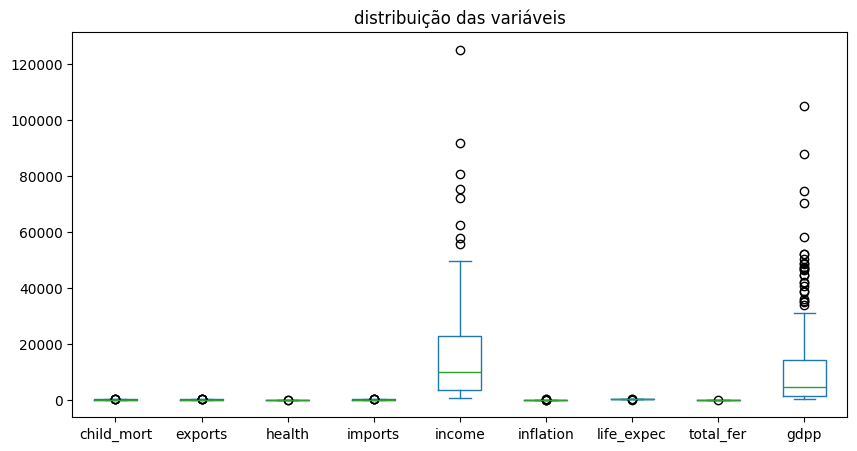

In [5]:
import matplotlib.pyplot as plt

df[lista].plot(kind='box', title='distribuição das variáveis',figsize =(10,5))

Abaixo analisei a distribuição dos dados das colunas de maneira apartada

Distribuição da coluna child_mort



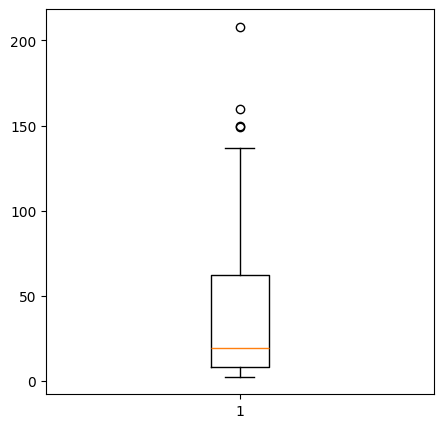


 ------------------------------------------------------------------- 

Distribuição da coluna exports



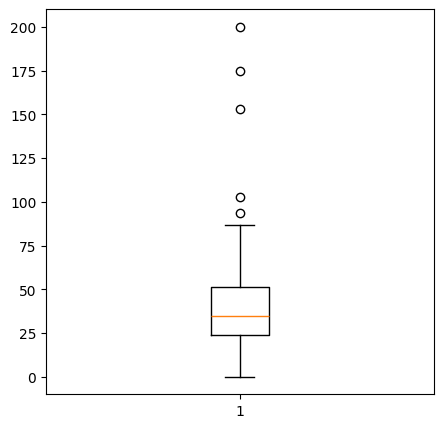


 ------------------------------------------------------------------- 

Distribuição da coluna health



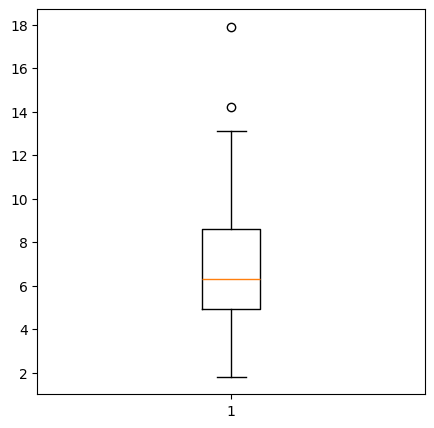


 ------------------------------------------------------------------- 

Distribuição da coluna imports



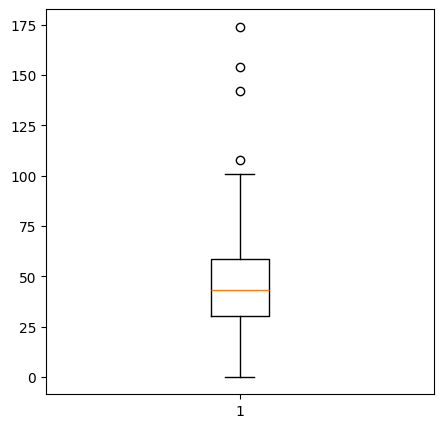


 ------------------------------------------------------------------- 

Distribuição da coluna income



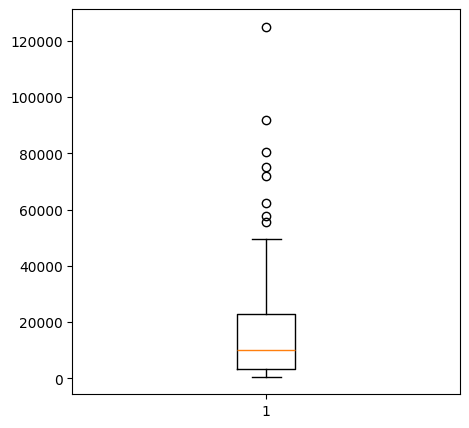


 ------------------------------------------------------------------- 

Distribuição da coluna inflation



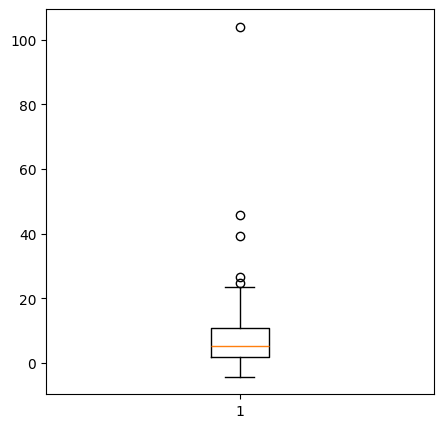


 ------------------------------------------------------------------- 

Distribuição da coluna life_expec



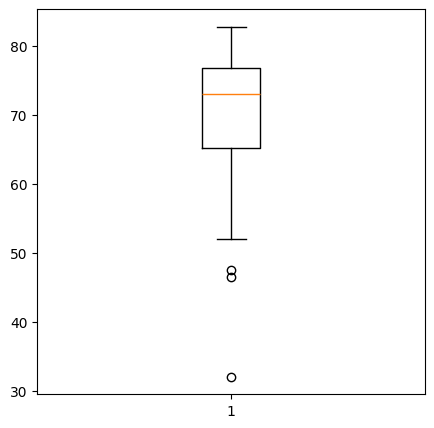


 ------------------------------------------------------------------- 

Distribuição da coluna total_fer



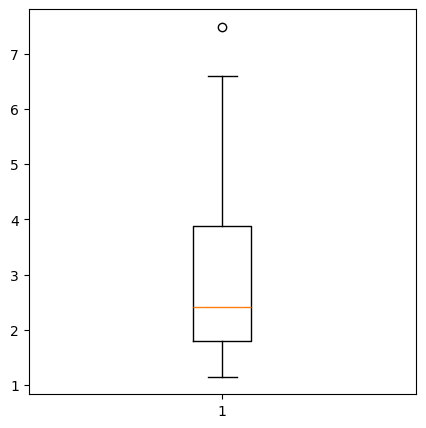


 ------------------------------------------------------------------- 

Distribuição da coluna gdpp



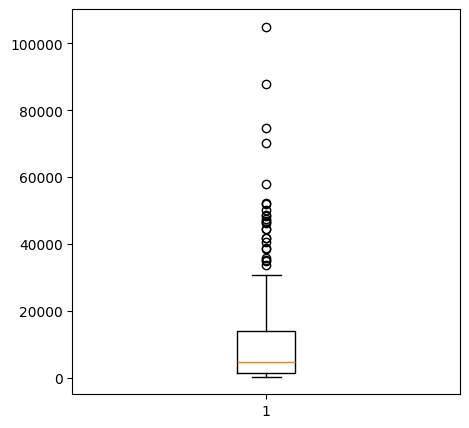


 ------------------------------------------------------------------- 



In [6]:
import matplotlib.pyplot as plt

for x in lista:
  print('Distribuição da coluna ' + x +  '\n')
  plt.figure(figsize =(5,5))
  plt.boxplot(df[x])
  plt.show()
  print('\n ------------------------------------------------------------------- \n' )

In [7]:
df[df['gdpp'] >100000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000


In [8]:
df[df['inflation'] >100]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


Luxemburgo, por exemplo, é o país com o maior PIB per capita da nossa lista, destacando-se como um outlier positivo nesse aspecto. Em contrapartida, a Nigéria apresenta um desempenho negativo em relação à inflação. Ao analisarmos o dicionário dos dados e os gráficos de distribuição, podemos identificar agrupamentos de países em três categorias: subdesenvolvidos, em desenvolvimento e desenvolvidos.

Porém utilizaremos o a função StandardScaler, para que todas as vaiáveis estejam na mesma escala.

<Axes: title={'center': 'distribuição das variáveis'}>

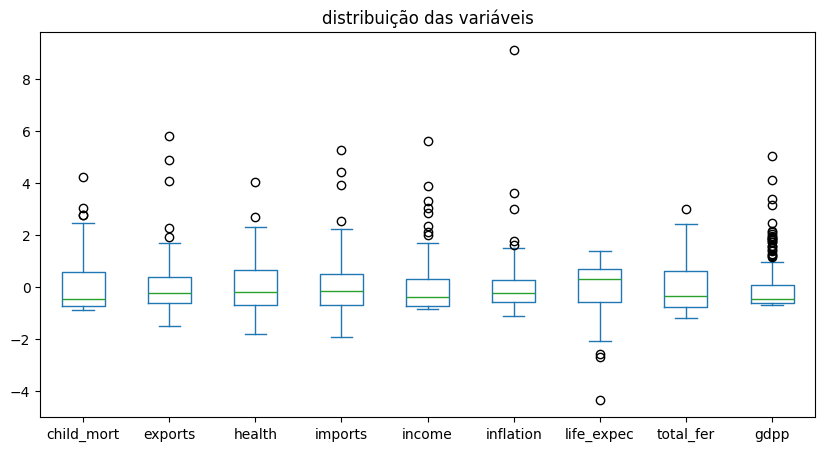

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[lista]),columns=lista)

df_scaled.plot(kind='box', title='distribuição das variáveis',figsize =(10,5))

<Axes: title={'center': 'distribuição das variáveis'}>

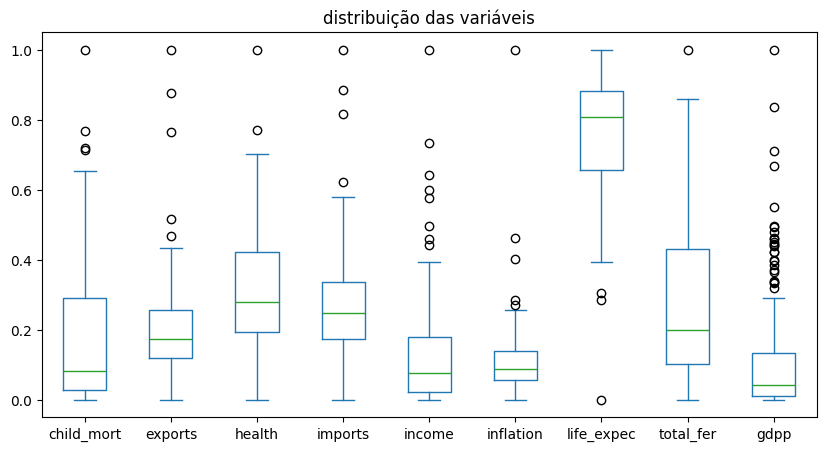

In [10]:
from sklearn.preprocessing import MinMaxScaler

MinMax = MinMaxScaler()

df_MinMax = pd.DataFrame(MinMax.fit_transform(df[lista]),columns=lista)

df_MinMax.plot(kind='box', title='distribuição das variáveis',figsize =(10,5))

No nosso caso utilizaremos o método de normalização MinMaxScaler, pois não queremos sinalizar valores negativos na expectativa de vida.

# Para esse agrupamento iremos utilizar dois métodos não supervisionados de similiaridade:

### - K-Means
### - Hierarchical Clustering

#K-Means

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

kmeans.fit(df_MinMax)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [12]:
clusters = kmeans.predict(df_MinMax)

df_Kmenas1 = df
df_Kmenas1['cluster'] = clusters

In [13]:
df_Kmenas1['exports'].max()

200.0

In [14]:
df_Kmenas2 = df.copy()
df_Kmenas2['cluster'] = clusters
df_Kmenas2['exports'] = (df_Kmenas2['exports']/100) * df_Kmenas2['gdpp']
df_Kmenas2['imports'] = (df_Kmenas2['imports']/100) * df_Kmenas2['gdpp']

In [15]:
df_Kmenas1['exports'].max()

200.0

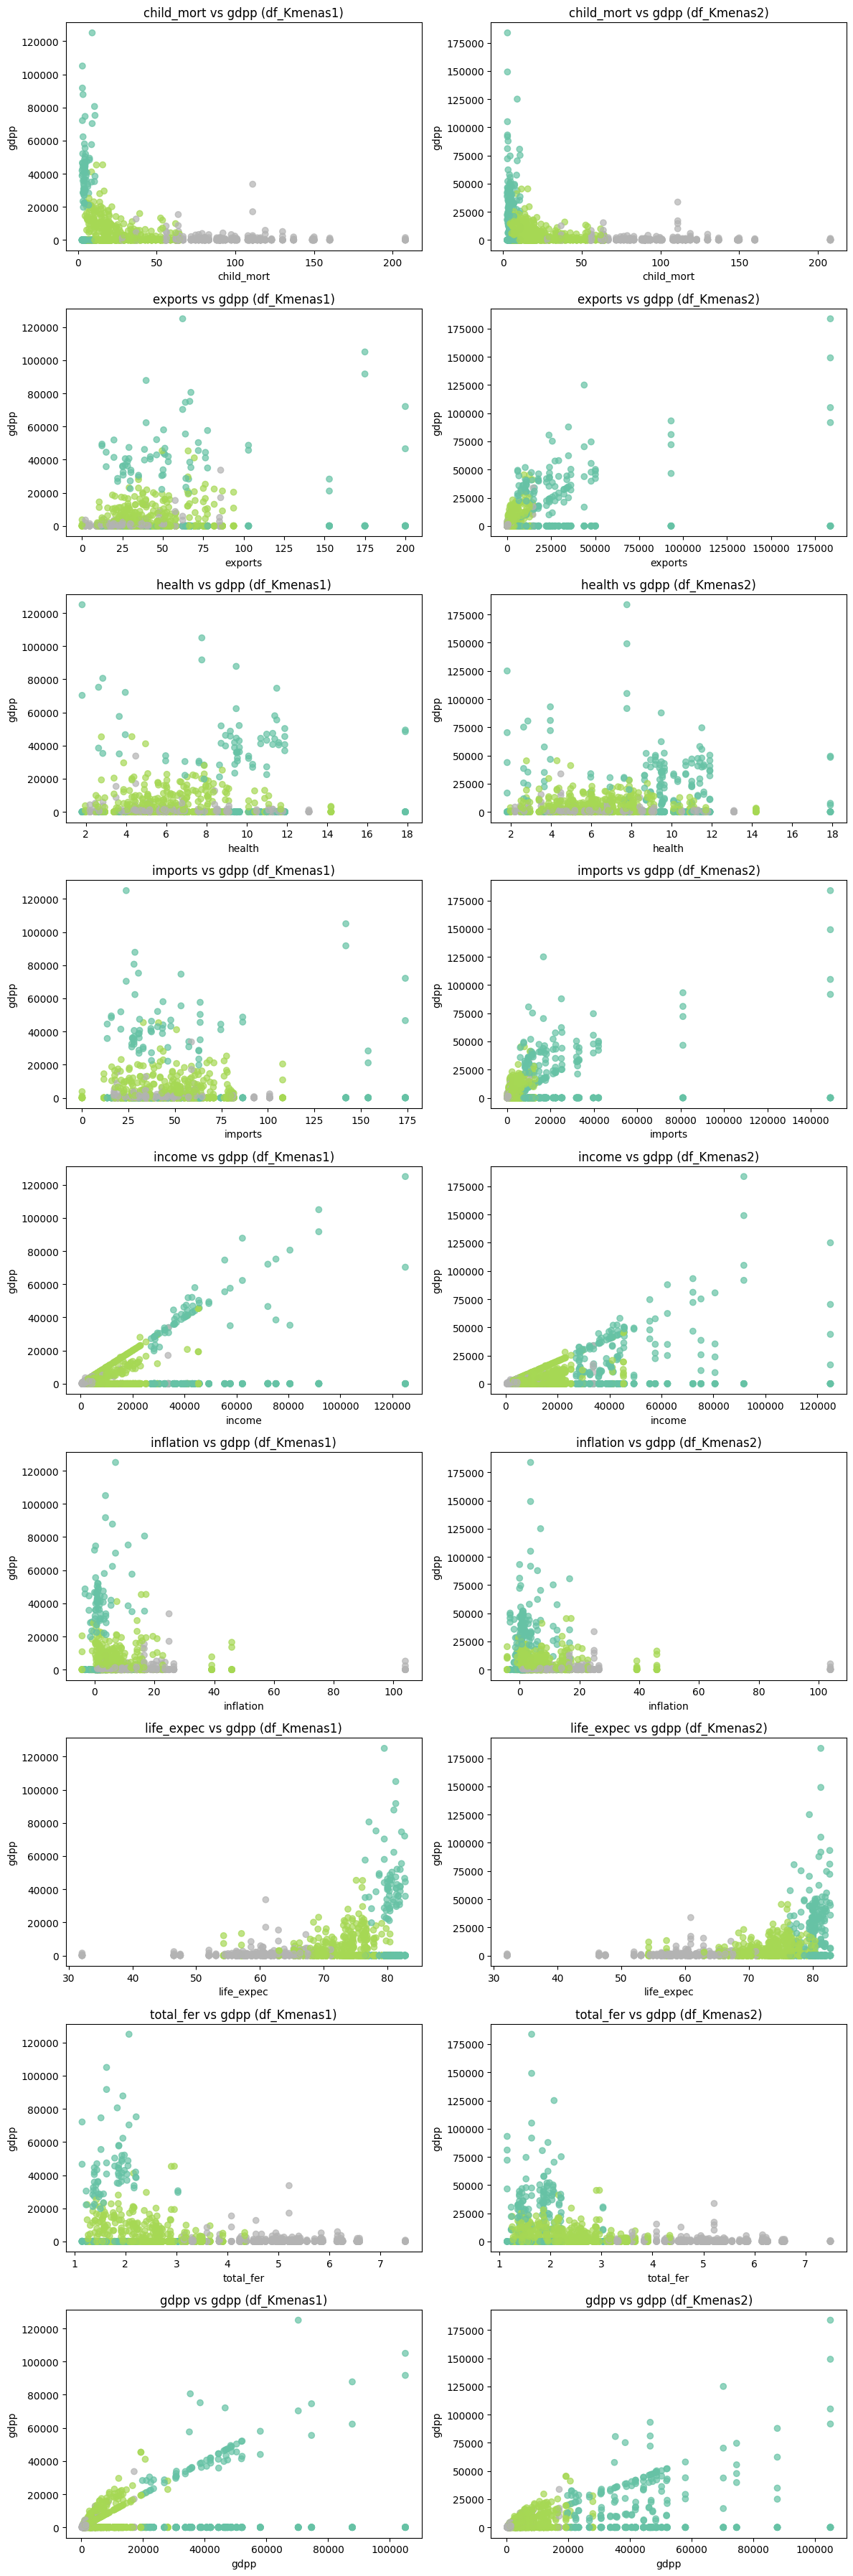

In [16]:
# Loop para criar gráficos de dispersão entre pares de variáveis
variaveis = ['child_mort', 'exports', 'health', 'imports', 'income',
             'inflation', 'life_expec', 'total_fer', 'gdpp']
n = len(variaveis)

fig, axes = plt.subplots(n, 2, figsize=(12, 4 * n))  # 2 colunas para os gráficos lado a lado

# Loop para criar gráficos de dispersão entre pares de variáveis
for i in range(n):
    for j in range(n):  # j=0 para df_Kmenas1, j=1 para df_Kmenas2
        axes[i, 0].scatter(
            df_Kmenas1[variaveis[i]],
            df_Kmenas1[variaveis[j]],
            c=df_Kmenas1['cluster'],
            cmap='Set2',
            alpha=0.7
        )
        # Rótulos dos eixos
        axes[i, 0].set_xlabel(variaveis[i])
        axes[i, 0].set_ylabel(variaveis[j])
        axes[i, 0].set_title(f'{variaveis[i]} vs {variaveis[j]} ({"df_Kmenas1"})')

        axes[i, 1].scatter(
            df_Kmenas2[variaveis[i]],
            df_Kmenas2[variaveis[j]],
            c=df_Kmenas2['cluster'],
            cmap='Set2',
            alpha=0.7
        )

        # Rótulos dos eixos
        axes[i, 1].set_xlabel(variaveis[i])
        axes[i, 1].set_ylabel(variaveis[j])
        axes[i, 1].set_title(f'{variaveis[i]} vs {variaveis[j]} ({"df_Kmenas2"})')

# Ajusta o layout para que não haja sobreposição
plt.tight_layout()
plt.show()

Usaremos o df_Kmeans2 que é o dataframe com a modelagem de Export x Gdpp e Import x Gdpp que acaba trazendo a exportação e importação per capita absoluta para nossa análise invés de porcentagens que acabaram de mostrando pouco eficientes em clusterizar.

<Axes: title={'center': 'distribuição das variáveis'}>

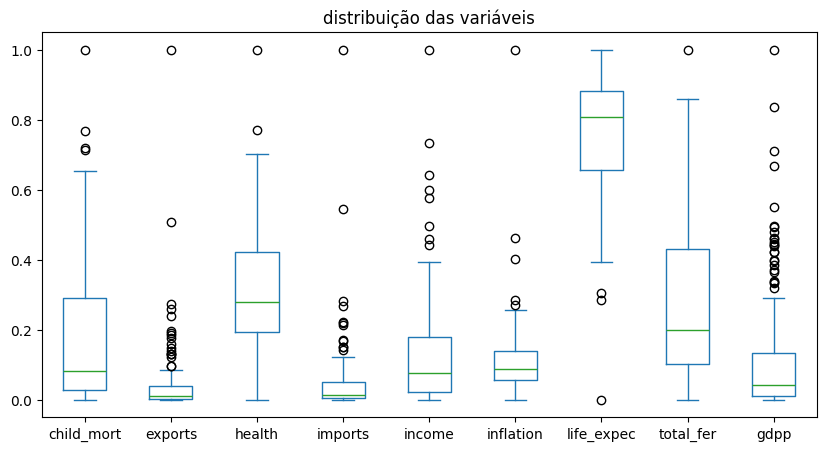

In [17]:
MinMax = MinMaxScaler()

df_MinMax_correto = pd.DataFrame(MinMax.fit_transform(df_Kmenas2[lista]),columns=lista)

df_MinMax_correto.plot(kind='box', title='distribuição das variáveis',figsize =(10,5))

In [18]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

kmeans.fit(df_MinMax_correto)

clusters2 = kmeans.predict(df_MinMax_correto)
df_MinMax_correto['country'] = df['country']
df_MinMax_correto['cluster'] = clusters2


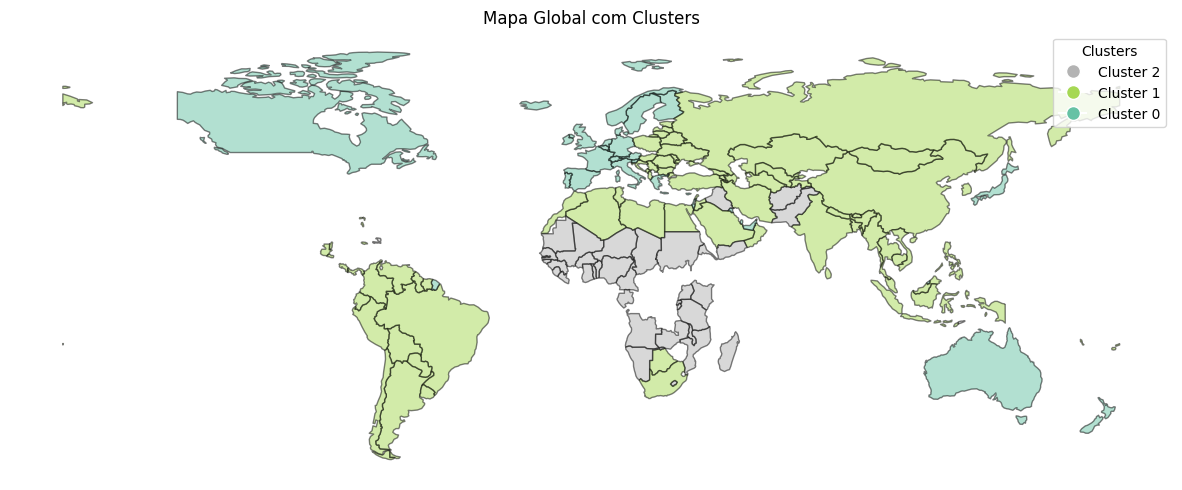

In [19]:
import geopandas as gpd

# Carregar os dados de geometria mundial
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Mesclar os dados de df_Kmenas2 com o GeoDataFrame
world = world.merge(df_MinMax_correto[['country', 'cluster']], how='right', left_on='NAME', right_on='country')

cmap = plt.get_cmap('Set2', world['cluster'].nunique())
norm = plt.Normalize(world['cluster'].min(), world['cluster'].max())

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotar o mapa com os dados de df_Kmenas2
world.plot(column='cluster', ax=ax, legend=False, cmap=cmap, edgecolor='black',alpha=0.5)

plt.title('Mapa Global com Clusters')
plt.axis('off')  # Desliga os eixos para uma melhor visualização

# Criar a legenda normal com quadradinhos
unique_clusters = world['cluster'].unique()  # Obtém os clusters únicos

colors = [cmap(norm(cluster)) for cluster in unique_clusters]  # Cores correspondentes para os clusters

# Adicionar a legenda manualmente
legend_labels = [f'Cluster {int(cluster)}' for cluster in unique_clusters]  # Rótulos para a legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                       markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]

# Adicionar a legenda ao gráfico
ax.legend(handles=handles, title="Clusters", loc='upper right', bbox_to_anchor=(1, 1))

# Mostrar o gráfico
plt.show()

Podemos ver pelo gráfico acima que nossos agrupamentos agruparam países "pobres" como cluster 2, países em desenvolvimento como cluster 1 e países desenvolvidos em cluster 0. Temos alguns países faltantes como por exemplo os Estados Unidos, países da America Central e países da Africa.

In [20]:
df_Kmenas2.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster'],
      dtype='object')

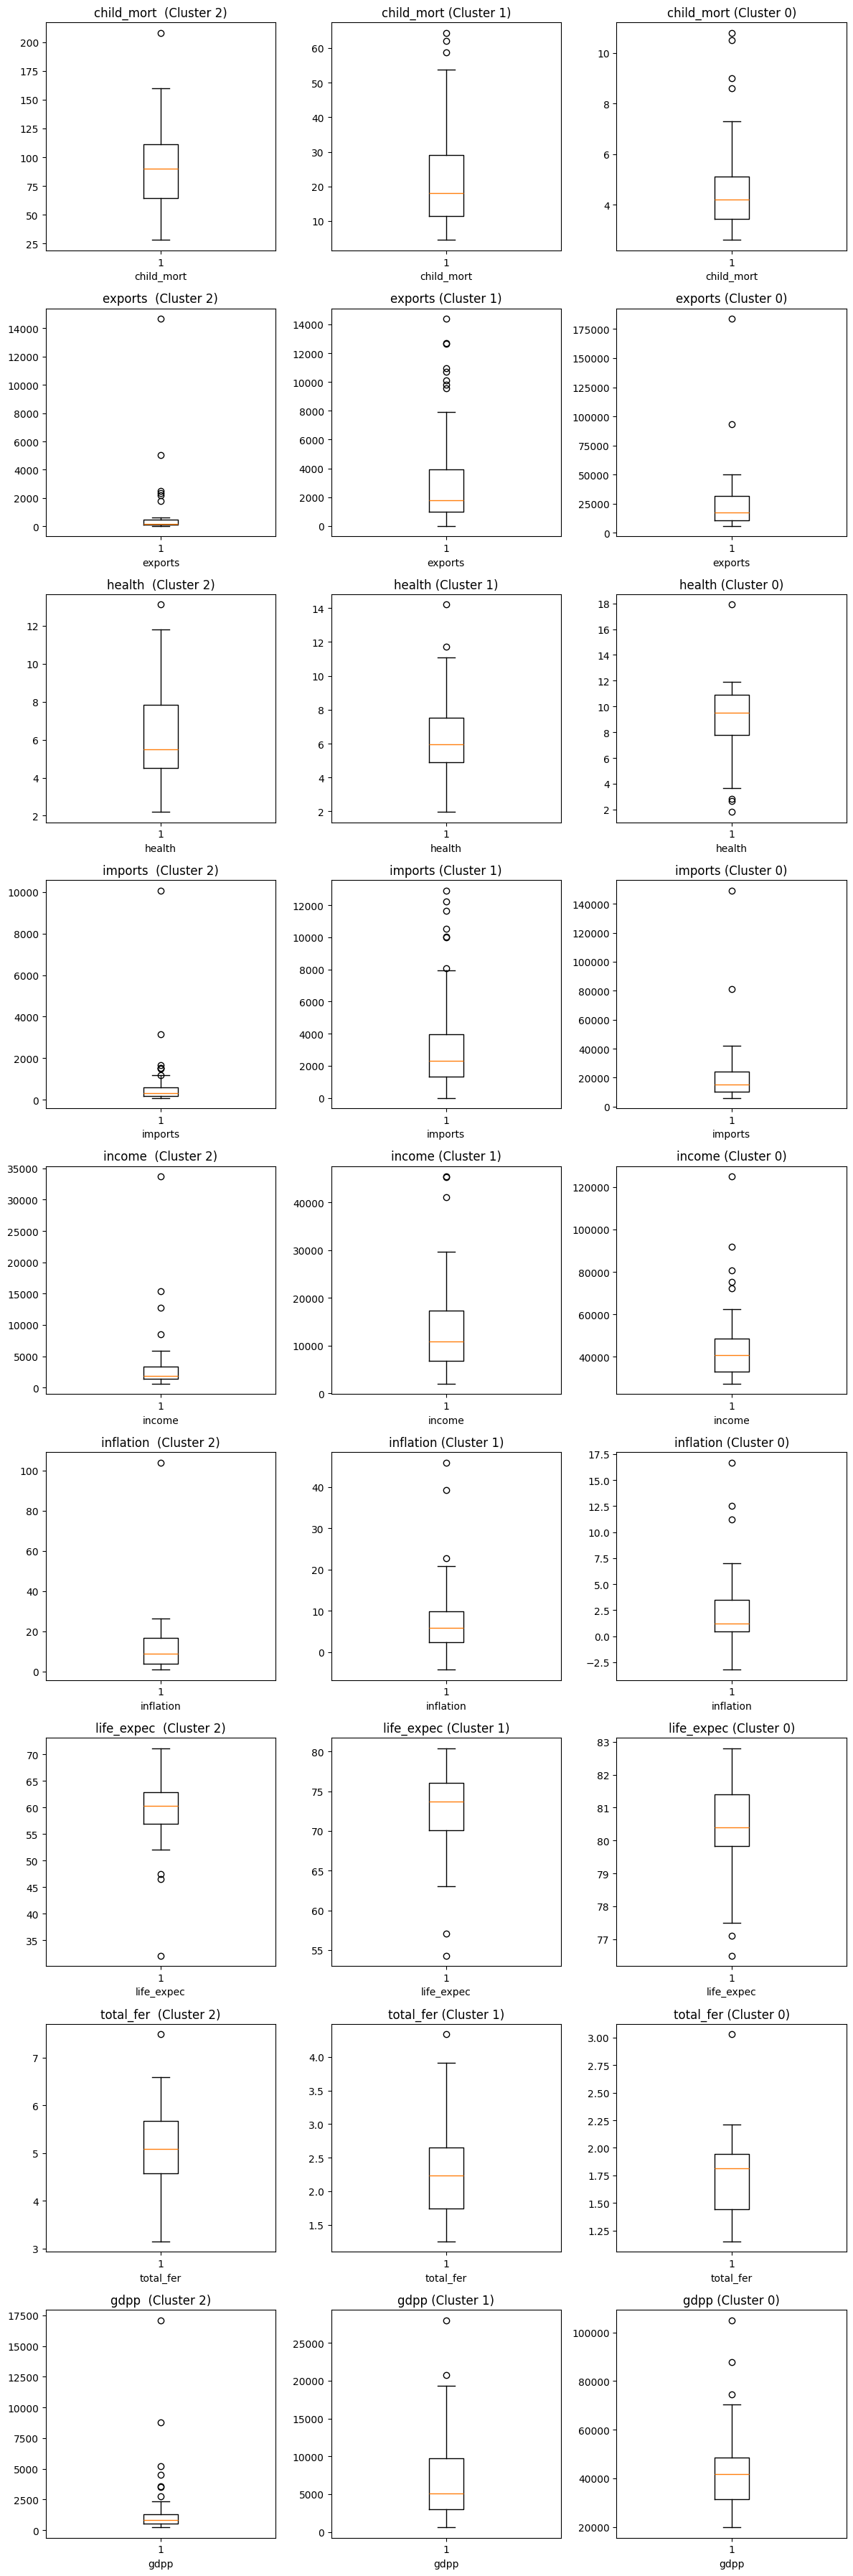

In [21]:
fig, axes = plt.subplots(n, 3, figsize=(12, 4 * n))
dict = {'child_mort':[], 'exports':[], 'health':[], 'imports':[], 'income':[],'inflation':[], 'life_expec':[], 'total_fer':[], 'gdpp':[]}
for i in range(n):
  median = []
  axes[i, 0].boxplot(
      df_Kmenas2[df_Kmenas2['cluster'] == 2][variaveis[i]],
  )
  median.append(df_Kmenas2[df_Kmenas2['cluster'] == 2][variaveis[i]].median())

  # Rótulos dos eixos
  axes[i, 0].set_xlabel(variaveis[i])
  axes[i, 0].set_title(f'{variaveis[i]}  ({"Cluster 2"})')

  axes[i, 1].boxplot(
      df_Kmenas2[df_Kmenas2['cluster'] == 1][variaveis[i]],
  )
  median.append(df_Kmenas2[df_Kmenas2['cluster'] == 1][variaveis[i]].median())

  # Rótulos dos eixos
  axes[i, 1].set_xlabel(variaveis[i])
  axes[i, 1].set_title(f'{variaveis[i]} ({"Cluster 1"})')

  axes[i, 2].boxplot(
      df_Kmenas2[df_Kmenas2['cluster'] == 0][variaveis[i]],
  )
  median.append(df_Kmenas2[df_Kmenas2['cluster'] == 0][variaveis[i]].median())

  # Rótulos dos eixos
  axes[i, 2].set_xlabel(variaveis[i])
  axes[i, 2].set_title(f'{variaveis[i]} ({"Cluster 0"})')
  dict[variaveis[i]] = median

# Ajusta o layout para que não haja sobreposição
plt.tight_layout()
plt.show()

In [24]:
for x in range(3):

  lista = [ 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

  df_diferenca = df_Kmenas2[df_Kmenas2['cluster'] == x][lista].apply(lambda col: abs(col - dict[col.name][0]))

  indice_mais_proximo = df_diferenca.sum(axis=1).idxmin()

  linha = df_Kmenas2.loc[indice_mais_proximo]

  print('Esse é o país que representa o cluster ' + str(x) + ': ' + linha['country'],'\n\n',linha,'\n\n')

Esse é o país que representa o cluster 0: Portugal 

 country       Portugal
child_mort         3.9
exports         6727.5
health            11.0
imports         8415.0
income           27200
inflation        0.643
life_expec        79.8
total_fer         1.39
gdpp             22500
cluster              0
Name: 122, dtype: object 


Esse é o país que representa o cluster 1: Tajikistan 

 country       Tajikistan
child_mort          52.4
exports          109.962
health              5.98
imports          432.468
income              2110
inflation           12.5
life_expec          69.6
total_fer           3.51
gdpp                 738
cluster                1
Name: 146, dtype: object 


Esse é o país que representa o cluster 2: Benin 

 country         Benin
child_mort      111.0
exports       180.404
health            4.1
imports       281.976
income           1820
inflation       0.885
life_expec       61.8
total_fer        5.36
gdpp              758
cluster             2
Name: 17, dty

#Hierarchical Clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

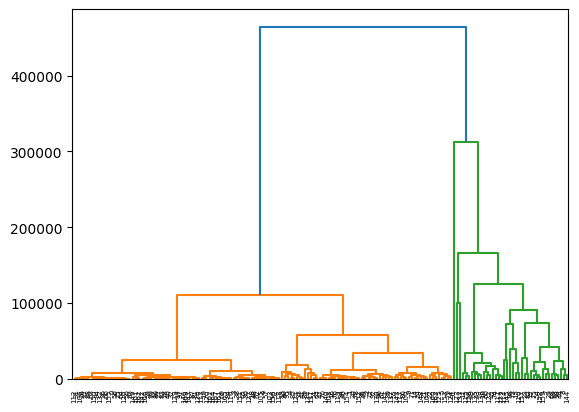

In [26]:
linkage_data = linkage(df_Kmenas2[lista], method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

Analisando o gráfico acima ja seriam 3 clusters ideais analisando o dendograma.

In [27]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
MinMax = MinMaxScaler()

df_MinMax_correto_HC = pd.DataFrame(MinMax.fit_transform(df_Kmenas2[lista]),columns=lista)
labels = hierarchical_cluster.fit_predict(df_MinMax_correto_HC)

df_MinMax_correto_HC['country'] = df['country']
df_MinMax_correto_HC['cluster'] = labels

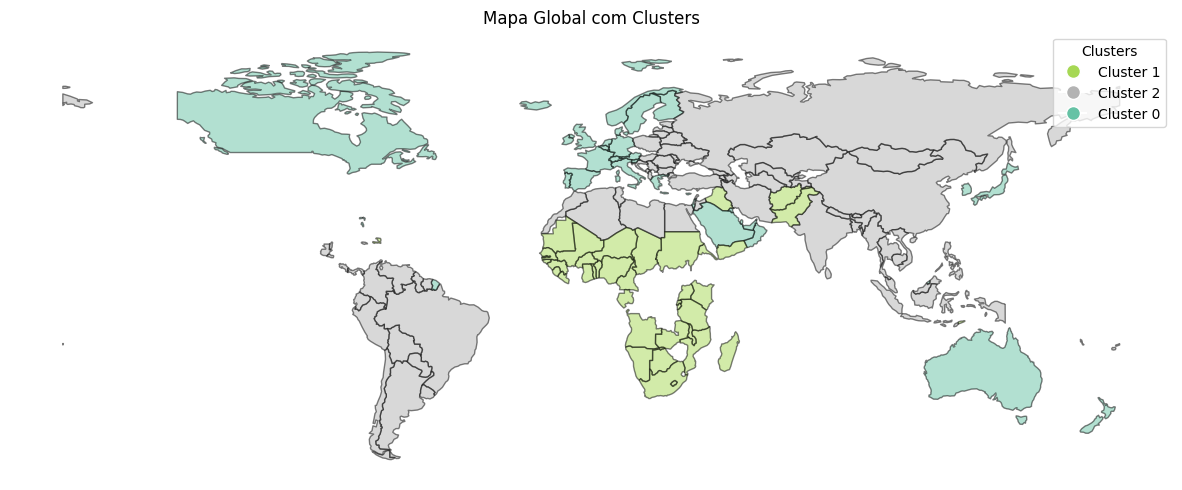

In [28]:
import geopandas as gpd

# Carregar os dados de geometria mundial
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Mesclar os dados de df_Kmenas2 com o GeoDataFrame
world = world.merge(df_MinMax_correto_HC[['country', 'cluster']], how='right', left_on='NAME', right_on='country')

cmap = plt.get_cmap('Set2', world['cluster'].nunique())
norm = plt.Normalize(world['cluster'].min(), world['cluster'].max())

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotar o mapa com os dados de df_Kmenas2
world.plot(column='cluster', ax=ax, legend=False, cmap=cmap, edgecolor='black',alpha=0.5)

plt.title('Mapa Global com Clusters')
plt.axis('off')  # Desliga os eixos para uma melhor visualização

# Criar a legenda normal com quadradinhos
unique_clusters = world['cluster'].unique()  # Obtém os clusters únicos

colors = [cmap(norm(cluster)) for cluster in unique_clusters]  # Cores correspondentes para os clusters

# Adicionar a legenda manualmente
legend_labels = [f'Cluster {int(cluster)}' for cluster in unique_clusters]  # Rótulos para a legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                       markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]

# Adicionar a legenda ao gráfico
ax.legend(handles=handles, title="Clusters", loc='upper right', bbox_to_anchor=(1, 1))

# Mostrar o gráfico
plt.show()

# Conclusão

## K-means

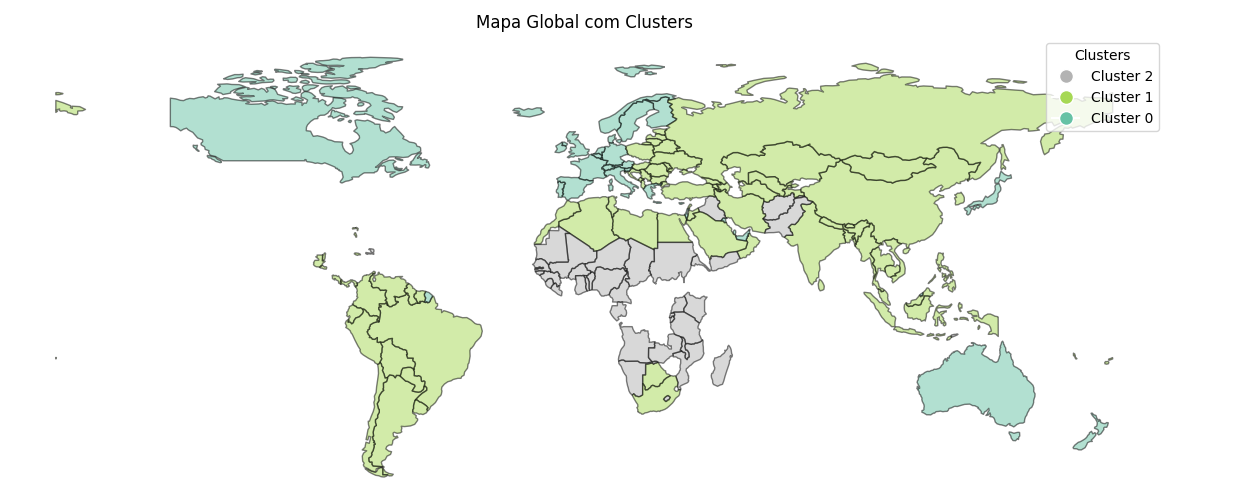


## Clusterização hierárquica

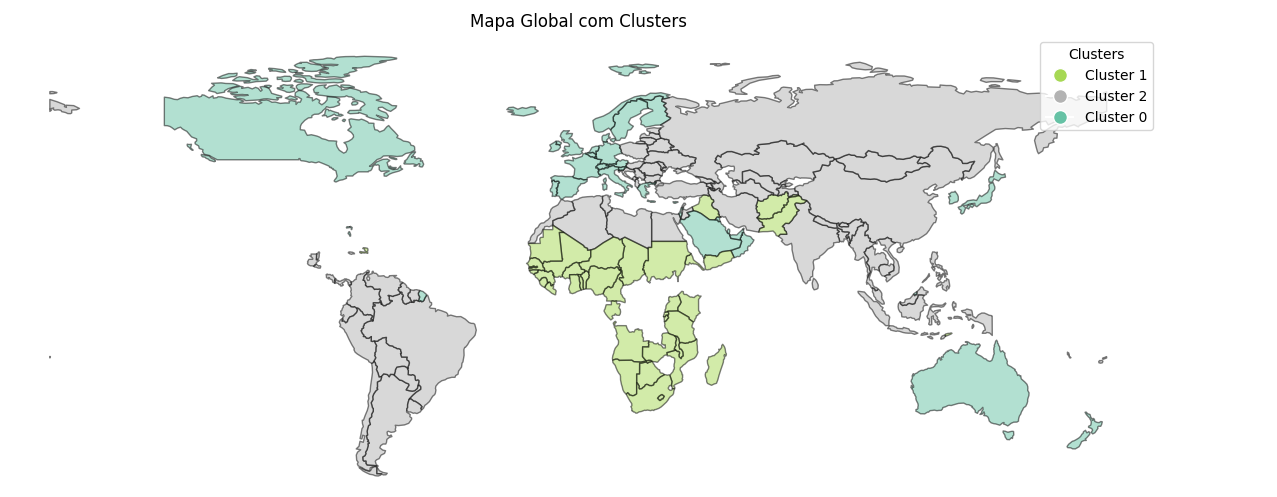



### Ambos os gráficos mostram que as respostas fornecidas pelos dois modelos são bastante similares, com poucas diferenças no agrupamento dos países. Emirados Árabes Unidos, Omã e Arábia Saudita foram classificados no cluster 0, que corresponde ao grupo de países desenvolvidos utilizando a técnica de clusterização hierárquica. Essa classificação é provavelmente influenciada por fatores como o balanço entre exportações e importações, além de outros indicadores econômicos que os posicionam como nações ricas.
